In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cardio_df= pd.read_csv("cardio_base.csv")
cardio_df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
5,8,21914,1,151,67.0,120,80,2,0
6,9,22113,1,157,93.0,130,80,3,0
7,12,22584,2,178,95.0,130,90,3,0
8,13,17668,1,158,71.0,110,70,1,0
9,14,19834,1,164,68.0,110,60,1,0


In [3]:
cardio_df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
smoke            int64
dtype: object

In [4]:
#To convert age from days to years
cardio_df['age'] = (cardio_df['age'] / 365).astype(int)
#cardio_df['gender'] = cardio_df['gender'].apply(str)
cardio_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,50,2,168,62.0,110,80,1,0
1,1,55,1,156,85.0,140,90,3,0
2,2,51,1,165,64.0,130,70,3,0
3,3,48,2,169,82.0,150,100,1,0
4,4,47,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1
69996,99995,61,1,158,126.0,140,90,2,0
69997,99996,52,2,183,105.0,180,90,3,0
69998,99998,61,1,163,72.0,135,80,1,0


In [5]:
cardio_df.insert(3,'gender_string',0)

In [6]:
cardio_df.groupby('gender').agg({'height': 'mean'})

,height
gender,
1,161.355612
2,169.947895


In [7]:
cardio_df.groupby('gender').agg({'weight': 'mean'}) 
#2 is taller and heavier than 1 so it does probably refer to male and 2 to females

,weight
gender,
1,72.565605
2,77.257307


In [8]:
cardio_df.loc[cardio_df['gender'] == 1, 'gender_string'] = 'female' 
cardio_df.loc[cardio_df['gender'] != 1, 'gender_string'] = 'male' 
cardio_df

,id,age,gender,gender_string,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,50,2,male,168,62.0,110,80,1,0
1,1,55,1,female,156,85.0,140,90,3,0
2,2,51,1,female,165,64.0,130,70,3,0
3,3,48,2,male,169,82.0,150,100,1,0
4,4,47,1,female,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,male,168,76.0,120,80,1,1
69996,99995,61,1,female,158,126.0,140,90,2,0
69997,99996,52,2,male,183,105.0,180,90,3,0
69998,99998,61,1,female,163,72.0,135,80,1,0


In [9]:
#how much is it more likely for men to be smokers compared to women/
smokers_by_gender = cardio_df.groupby('gender').agg({'smoke': 'sum'})
smokers_by_gender[smokers_by_gender.index == 2]['smoke'].item() / smokers_by_gender[smokers_by_gender.index == 1]['smoke'].item()

6.587945879458794

Text(0, 0.5, 'Weight (kg)')

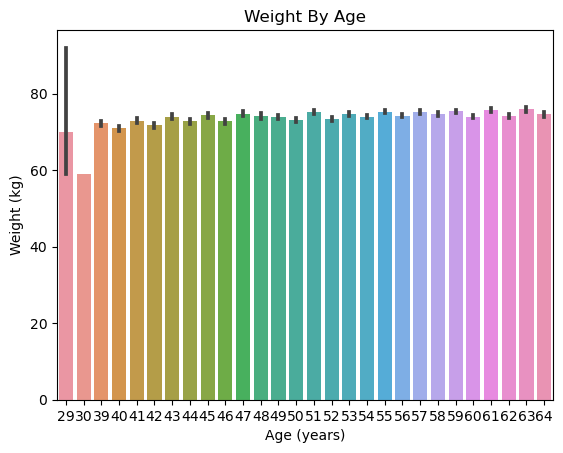

In [33]:
WeightChart=sns.barplot(x='age', y='weight', data=cardio_df)
WeightChart.set_title('Weight By Age')
WeightChart.set_xlabel('Age (years)')
WeightChart.set_ylabel('Weight (kg)')

In [28]:
avg_weight_by_age = cardio_df.groupby('age').agg({'weight': 'mean'})
avg_weight_by_age.max()

weight    75.873721
dtype: float64

Text(0, 0.5, 'Height (cm)')

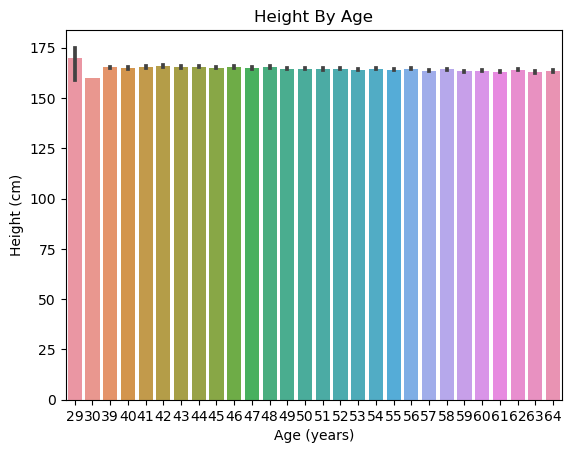

In [11]:
HeightChart=sns.barplot(x='age', y='height', data=cardio_df)
HeightChart.set_title('Height By Age')
HeightChart.set_xlabel('Age (years)')
HeightChart.set_ylabel('Height (cm)')

In [12]:
#average height of the tallest 1% or the 99th percentile
cardio_df['height'].quantile(0.99)

184.0

In [13]:
hi_blood_pressure_smoking=cardio_df.groupby('smoke').agg({'ap_hi': 'mean'}) 
hi_blood_pressure_smoking

,ap_hi
smoke,
0,128.861431
1,128.360512


In [14]:
lo_blood_pressure_smoking=cardio_df.groupby('smoke').agg({'ap_lo': 'mean'}) 
lo_blood_pressure_smoking
#smokers are more likely to have high blood pressure compared to non-smokers

,ap_lo
smoke,
0,96.326550
1,99.774518


In [15]:
hi_blood_pressure_gender = cardio_df.groupby('gender_string').agg({'ap_hi': 'mean'}) 
hi_blood_pressure_gender

,ap_hi
gender_string,
female,128.139249
male,130.078872


In [16]:
lo_blood_pressure_gender=cardio_df.groupby('gender_string').agg({'ap_lo': 'mean'}) 
lo_blood_pressure_gender

,ap_lo
gender_string,
female,94.522776
male,100.551982


In [17]:
hi_blood_pressure_by_gender_smoking = cardio_df.groupby(['gender_string','smoke']).agg({'ap_lo':'mean'})
hi_blood_pressure_by_gender_smoking

ap_lo
gender_string smoke            
female        0       94.404075
              1      101.051661
male          0      100.824160
              1       99.580657

In [18]:
lo_blood_pressure_by_gender_smoking = cardio_df.groupby(['gender_string','smoke']).agg({'ap_hi':'mean'})
lo_blood_pressure_by_gender_smoking
#men who smoke have the highest blood pressure on average.

ap_hi
gender_string smoke            
female        0      128.169220
              1      126.490775
male          0      130.480852
              1      128.644324

In [23]:
df_heatmap = cardio_df
df_heatmap = df_heatmap.drop('gender', axis=1)
df_heatmap = df_heatmap.drop('id', axis=1)

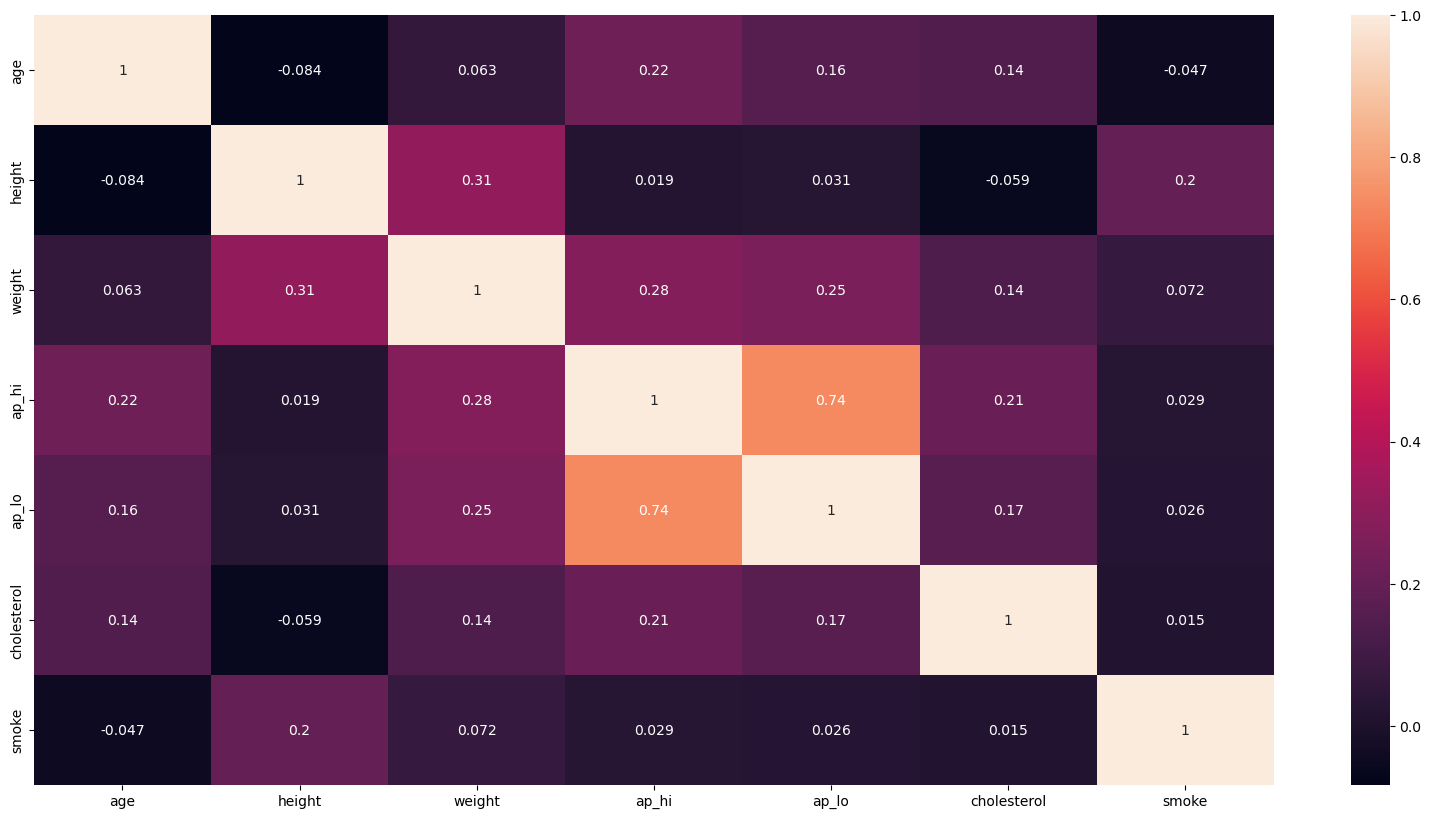

In [24]:
plt.figure(figsize=(20,10))
corr = df_heatmap.corr(method = 'spearman')
sns.heatmap(corr, annot = True)
plt.show()